# WeatherPy

---

### Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

random_lats = []
random_longs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        random_lats.append(lat_lng[0])
        random_longs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# City list to view
city_list = pd.DataFrame({'City': cities, 'Latitude': random_lats,
                           'Longitude': random_longs})
city_list.head()

Number of cities in the list: 622


,City,Latitude,Longitude
0,tsihombe,-30.826326,43.992541
1,busselton,-54.186757,85.242748
2,victoria,-10.380877,61.930876
3,neuquen,-38.425084,-68.287728
4,nizhneyansk,77.680067,135.031211


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}&units={units}&APPID={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | neuquen
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | katherine
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | burnie
Processing Record 16 of Set 1 | mwense
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | pacific grove
Processing Record 21 of Set 1

Processing Record 36 of Set 4 | gospic
Processing Record 37 of Set 4 | gallup
Processing Record 38 of Set 4 | nicolas bravo
Processing Record 39 of Set 4 | nizhnevartovsk
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | tilichiki
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | el tigre
Processing Record 44 of Set 4 | port keats
Processing Record 45 of Set 4 | norwich
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | los alamos
Processing Record 49 of Set 4 | solnechnyy
Processing Record 0 of Set 5 | chitungwiza
Processing Record 1 of Set 5 | moscow
Processing Record 2 of Set 5 | borovoy
Processing Record 3 of Set 5 | huarmey
Processing Record 4 of Set 5 | orocue
Processing Record 5 of Set 5 | lima
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | nisia floresta
Processing Recor

Processing Record 25 of Set 8 | shingu
Processing Record 26 of Set 8 | san jorge
Processing Record 27 of Set 8 | point fortin
Processing Record 28 of Set 8 | jiangyou
Processing Record 29 of Set 8 | san quintin
Processing Record 30 of Set 8 | premia de mar
Processing Record 31 of Set 8 | kaberamaido
Processing Record 32 of Set 8 | vila velha
Processing Record 33 of Set 8 | hasaki
Processing Record 34 of Set 8 | auki
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | setermoen
Processing Record 38 of Set 8 | takoradi
Processing Record 39 of Set 8 | pajapita
Processing Record 40 of Set 8 | grand-santi
Processing Record 41 of Set 8 | kavaratti
Processing Record 42 of Set 8 | nyzhni sirohozy
Processing Record 43 of Set 8 | rocha
Processing Record 44 of Set 8 | riverton
Processing Record 45 of Set 8 | tarakan
Processing Record 46 of Set 8 | laguna
Processing Record 47 of Set 8 | khuzdar
Processing Record 48 of Set 8 | belo

Processing Record 14 of Set 12 | peniche
Processing Record 15 of Set 12 | kalmunai
Processing Record 16 of Set 12 | buchanan
Processing Record 17 of Set 12 | yerofey pavlovich
Processing Record 18 of Set 12 | staraya toropa
Processing Record 19 of Set 12 | razole
Processing Record 20 of Set 12 | sao miguel do oeste
City not found. Skipping...
Processing Record 21 of Set 12 | meyungs
City not found. Skipping...
Processing Record 22 of Set 12 | middelburg
Processing Record 23 of Set 12 | acapulco
Processing Record 24 of Set 12 | goya
Processing Record 25 of Set 12 | kuche
City not found. Skipping...
Processing Record 26 of Set 12 | berlevag
Processing Record 27 of Set 12 | korla
Processing Record 28 of Set 12 | riyadh
Processing Record 29 of Set 12 | college
Processing Record 30 of Set 12 | inta
Processing Record 31 of Set 12 | sumbe
Processing Record 32 of Set 12 | sinnamary
Processing Record 33 of Set 12 | kushmurun
Processing Record 34 of Set 12 | merauke
Processing Record 35 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df["Date"].max(), unit='s').date()

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,16.32,49,1,2.71,AU,2023-04-22
1,victoria,22.2855,114.1577,24.10,91,89,7.60,HK,2023-04-22
2,neuquen,-38.9516,-68.0591,21.94,30,0,4.12,AR,2023-04-22
3,new norfolk,-42.7826,147.0587,13.72,65,69,0.45,AU,2023-04-22
4,atuona,-9.8000,-139.0333,27.44,78,56,6.33,PF,2023-04-22


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,16.32,49,1,2.71,AU,2023-04-22
1,victoria,22.2855,114.1577,24.10,91,89,7.60,HK,2023-04-22
2,neuquen,-38.9516,-68.0591,21.94,30,0,4.12,AR,2023-04-22
3,new norfolk,-42.7826,147.0587,13.72,65,69,0.45,AU,2023-04-22
4,atuona,-9.8000,-139.0333,27.44,78,56,6.33,PF,2023-04-22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

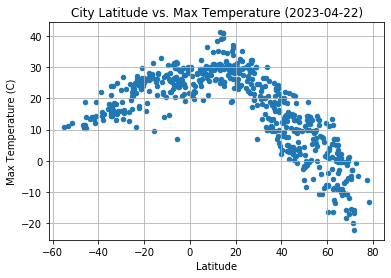

In [8]:
# Build scatter plot for latitude vs. temperature
date = city_data_df["Date"][0]
city_data_df.plot.scatter(["Lat"], ["Max Temp"])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

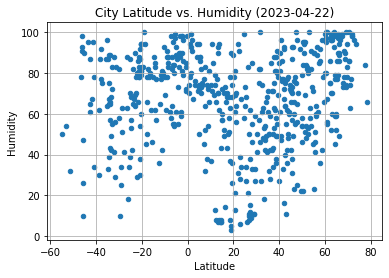

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(["Lat"], ["Humidity"])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

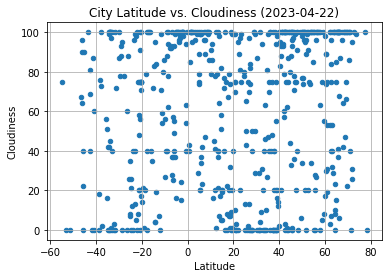

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(["Lat"], ["Cloudiness"])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

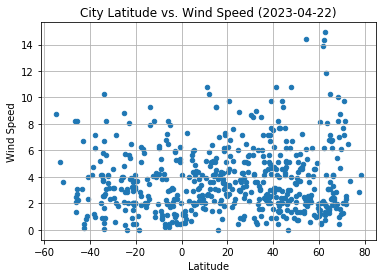

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(["Lat"], ["Wind Speed"])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, line_x, line_y):
    plt.scatter(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(f'y= {round(slope, 2)}x + {round(intercept, 2)}', (line_x, line_y), fontsize=15, color='r')
    print(f"The r-value is {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,victoria,22.2855,114.1577,24.10,91,89,7.60,HK,2023-04-22
8,jamestown,42.0970,-79.2353,10.80,93,100,8.23,US,2023-04-22
10,norman wells,65.2820,-126.8329,-2.98,86,100,6.69,CA,2023-04-22
14,bilibino,68.0546,166.4372,-10.51,73,42,1.95,RU,2023-04-22
16,pacific grove,36.6177,-121.9166,18.78,85,40,4.47,US,2023-04-22


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,16.32,49,1,2.71,AU,2023-04-22
2,neuquen,-38.9516,-68.0591,21.94,30,0,4.12,AR,2023-04-22
3,new norfolk,-42.7826,147.0587,13.72,65,69,0.45,AU,2023-04-22
4,atuona,-9.8000,-139.0333,27.44,78,56,6.33,PF,2023-04-22
5,ushuaia,-54.8000,-68.3000,10.81,50,75,8.75,AR,2023-04-22


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7606692238800711


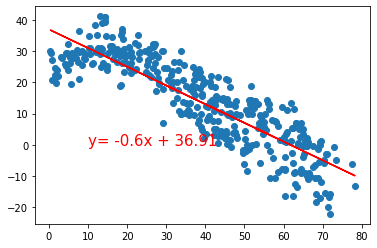

In [18]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 10, 0)


The r-value is 0.5081235018066736


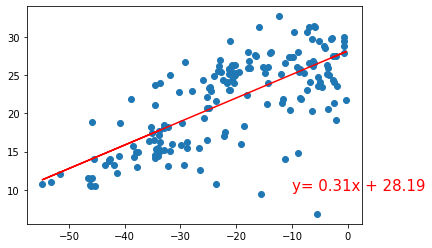

In [33]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -10, 10)


**Discussion about the linear relationship:** 
* The linear regression plots above show the correlation (r-value) for the relationship between temperature and latitude. 
* In the Northern Hemisphere we show a correlation of .76 which is considered a strong correlation. This means that temperatures will stay in the pattern of lower temperature at higher latitude and vice versa. This is a predictable linear relationship.
* In the Southern Hemisphere we show a correlation of .50 which is a low to moderate correlation. Thhis is a weaker linear relationship and considered less predictable. This could be because there are more cities in northern latitude locations and fewer in the Southern Hemisphere, leaving less data avaialble for this calculation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0802736966901926


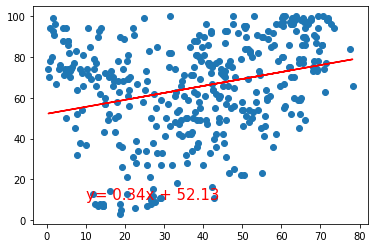

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 10, 10)


The r-value is 0.09690584281926673


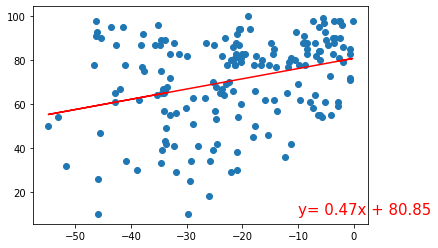

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -10, 10)


**Discussion about the linear relationship:** 
* The linear regression plots above show the correlation for the relationship between humidity and latitude. 
* In the Northern Hemisphere we show a correlation of .08 which is no correlation. There is no predictable linear relationship.
* In the Southern Hemisphere we show a correlation of .09 which is no correlation. There is no predictable linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0094100854876532


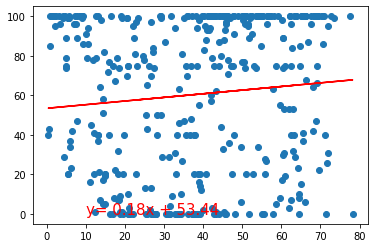

In [27]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 10, 0)


The r-value is 0.05177505547756202


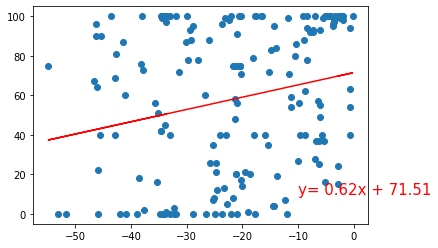

In [28]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -10, 10)


**Discussion about the linear relationship:** 
* The linear regression plots above show the correlation for the relationship between cloudiness and latitude. 
* In the Northern Hemisphere we show a correlation of .009 which is no correlation. There is no predictable linear relationship.
* In the Southern Hemisphere we show a correlation of .05 which is no correlation. There is no predictable linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0023996700966514074


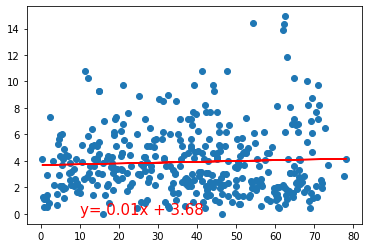

In [29]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 10, 0)

The r-value is 0.008558172860845068


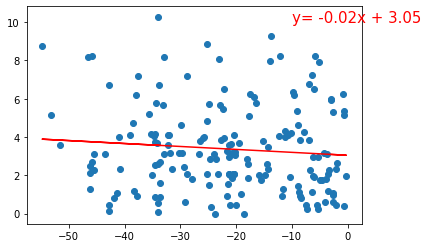

In [32]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -10, 10)


**Discussion about the linear relationship:** 
* The linear regression plots above show the correlation for the relationship between wind speed and latitude. 
* In the Northern Hemisphere we show a correlation of .002 which is no correlation. There is no predictable linear relationship.
* In the Southern Hemisphere we show a correlation of .008 which is no correlation. There is no predictable linear relationship.